In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io
from utilities.BasisFunctions import makeBasis_StimKernel, makeBasis_PostSpike, sameconv
from utilities.izhikevich_neuron import generate_izhikevich_stim, simulate_izhikevich
from utilities.fit_GLM_params import fit_GLM


# GLM for single neuron biophysics

This code uses the `Webber and Pillow 2017` MATLAB packages, modifies it and uses it to fit GLM to real RGCs. 


### Generate some data

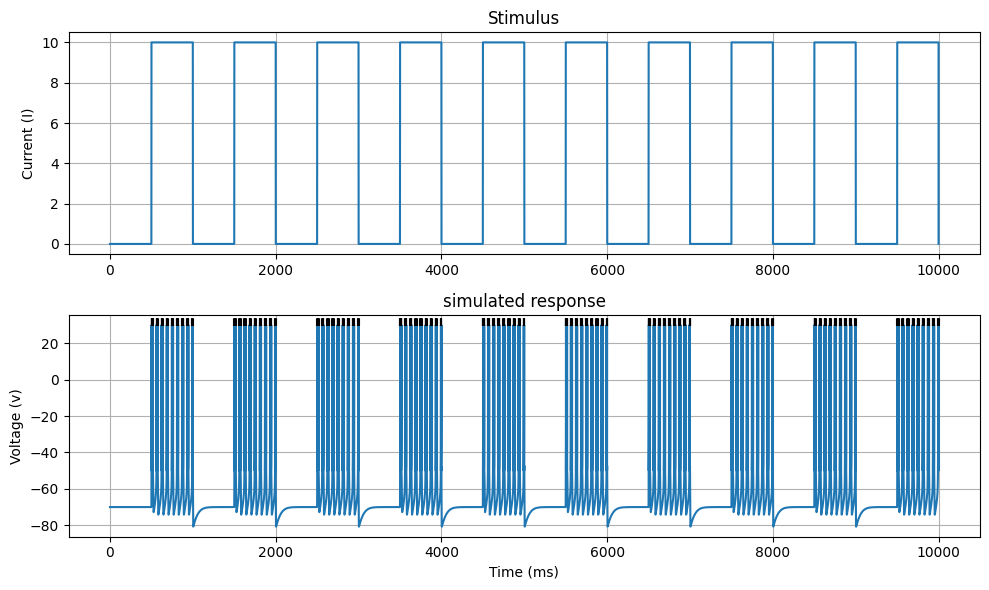

In [2]:
# Generate stimulus (from previous function)
T = 10000
celltype =3
I, dt = generate_izhikevich_stim(celltype, T)
# Simulate and plot the results
v, u, spikes, cid = simulate_izhikevich(celltype, I, dt, jitter=1, plotFlag=True, saveFlag=False)


In [13]:
# ## load data
filepath ='C:/Users/SchwartzLab/Documents/Schwartz_lab/Spike_Freq_Adapt/GLM_LN/data/'
stim_train = np.load( filepath + 'GLM_stim_train_fd2.npy', allow_pickle=True)
spike_times_train = np.load(filepath + 'GLM_spikes_train_fd2.npy',allow_pickle=True)
stim_test = np.load(filepath + 'GLM_stim_test_fd2.npy', allow_pickle=True)
spike_times_test = np.load(filepath +'GLM_spikes_test_fd2.npy',allow_pickle=True)
#Some useful facts
total_duration = 31 #seconds
sample_rate = 10*1000
frame_rate = 60 #Hz
desired_bin_size = 5/1000 #bins with 5 ms resolution
# desired_bin_size = 1/frame_rate
time_points_sp = np.arange(0, 31, desired_bin_size)

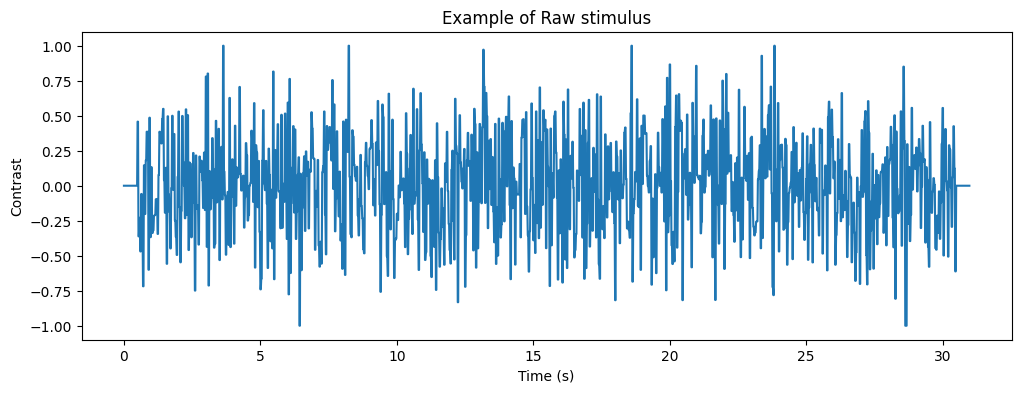

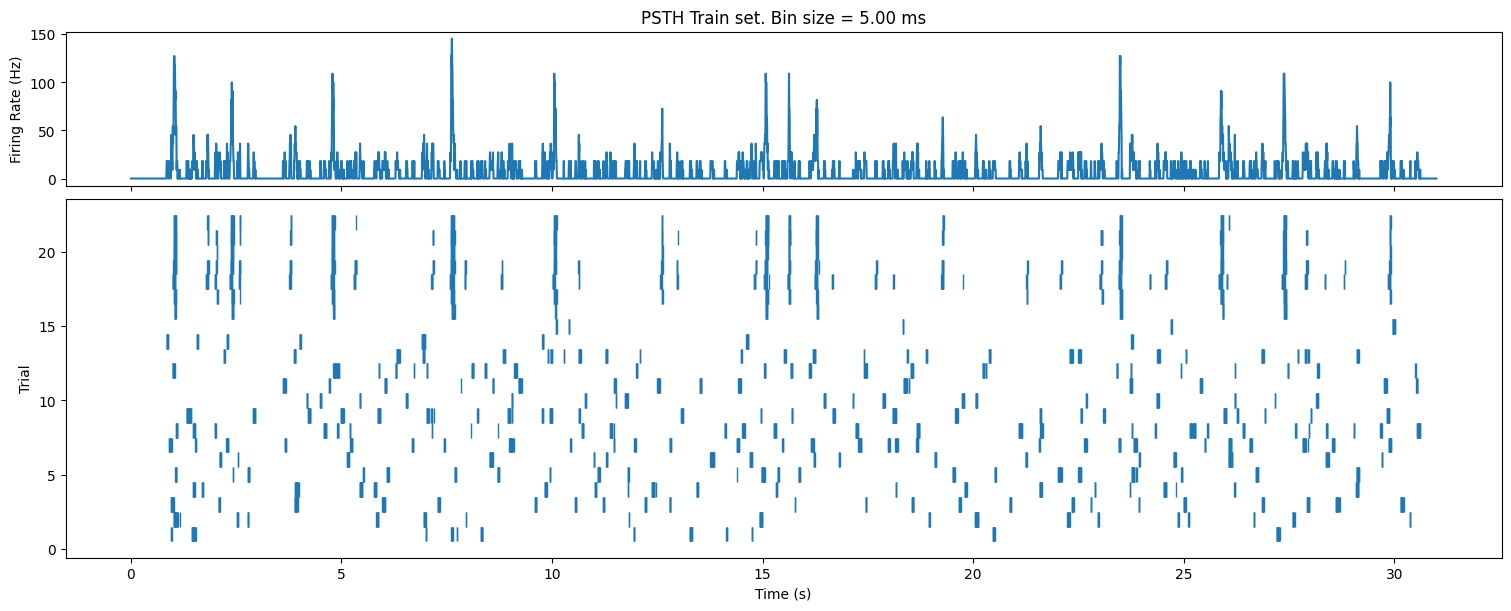

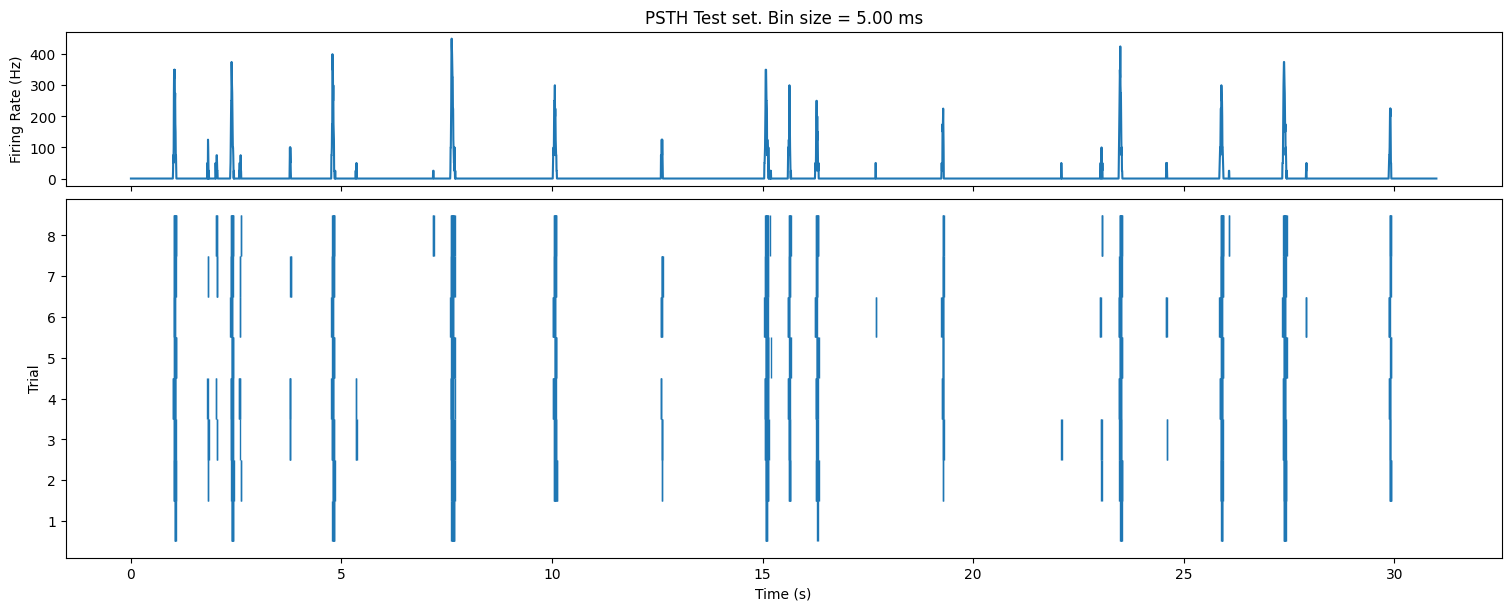

In [15]:
import sys
# Add the folder to sys.path
sys.path.append('C:/Users/SchwartzLab/Documents/Schwartz_lab/Spike_Freq_Adapt/GLM_LN/')
import LN_model_functions
# Now you can import the module
from LN_model_functions import *

train_spikes = binned_spike_train(spike_times_train, total_duration, bin_size=desired_bin_size)
test_spikes = binned_spike_train(spike_times_test, total_duration, bin_size=desired_bin_size)
test_psth, train_psth, NL_psth = plot_spike_info(stim_train, desired_bin_size, nr_spikes=train_spikes, rs_spikes_NL=None, rs_spikes_test=test_spikes, frame_rate=frame_rate)


Check stimulus and binned spike train have the same shape
(22, 6200) (22, 6200)


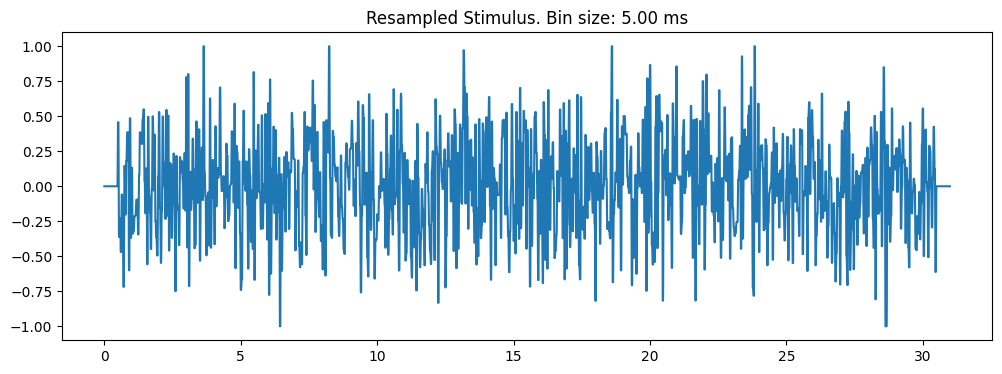

In [16]:
# We need to resample the stimulus to match the sampling rate of the spike train
if 1/frame_rate != desired_bin_size:
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    resampled_stim, stim_time_vector = signal_resample(stim_train, frame_rate, 1/desired_bin_size, desired_bin_size)
    plt.plot(stim_time_vector, resampled_stim[0])
    plt.title('Resampled Stimulus. Bin size: {:.2f} ms'.format(desired_bin_size*1000))
    
else:
    resampled_stim = stim_train
print("Check stimulus and binned spike train have the same shape")
print(resampled_stim.shape, train_spikes.shape)

In [ ]:
spikes = train_spikes.flatten()
I = resampled_stim.flatten()


(136400,)

### Simulation

In [25]:
# Define hyperparameters for basis functions (these can be optimized later)
kbasprs = {
    'neye': 1,           # Number of identity vectors at the front
    'ncos': 15,          # Number of raised cosine vectors for stimulus filter
    'kpeaks': [0, 600],   # Peak locations of the first and last basis vector (in ms)
    'b': 10             # Nonlinear stretching
}

ihbasprs = {
    'ncols': 7,          # Number of basis vectors for post-spike history filter
    'hpeaks': [0.1, 500], # Peak locations of first and last vector (in ms)
    'b': 10.0,              # Nonlinear stretching
    'absref': 1.0        # Absolute refractory period (in ms)
}


c:\Users\SchwartzLab\Documents\Schwartz_lab\Spike_Freq_Adapt\GLM_Adex\utilities\BasisFunctions.py:67: RuntimeWarning: invalid value encountered in divide
  kbasis = kbasis / np.sqrt(np.sum(kbasis ** 2, axis=0))
c:\Users\SchwartzLab\Documents\Schwartz_lab\Spike_Freq_Adapt\GLM_Adex\utilities\fit_GLM_params.py:103: OptimizeWarning: Unknown solver options: BFGS 
  result = minimize(objective_for_minimize, prs, jac=gradient_for_minimize, method='L-BFGS-B',


10000.0
Negative log-likelihood: nan
Negative Log-Likelihood: nan
Gradient Sample (first 5): [nan nan nan nan nan]
10000.0
Negative log-likelihood: nan
Negative Log-Likelihood: nan
Gradient Sample (first 5): [nan nan nan nan nan]
10000.0
Negative log-likelihood: nan
Negative Log-Likelihood: nan
Gradient Sample (first 5): [nan nan nan nan nan]
10000.0
Negative log-likelihood: nan
Negative Log-Likelihood: nan
Gradient Sample (first 5): [nan nan nan nan nan]
10000.0
Negative log-likelihood: nan
Negative Log-Likelihood: nan
Gradient Sample (first 5): [nan nan nan nan nan]
10000.0
Negative log-likelihood: nan
Negative Log-Likelihood: nan
Gradient Sample (first 5): [nan nan nan nan nan]
10000.0
Negative log-likelihood: nan
Negative Log-Likelihood: nan
Gradient Sample (first 5): [nan nan nan nan nan]
10000.0
Negative log-likelihood: nan
Negative Log-Likelihood: nan
Gradient Sample (first 5): [nan nan nan nan nan]
10000.0
Negative log-likelihood: nan
Negative Log-Likelihood: nan
Gradient Sampl

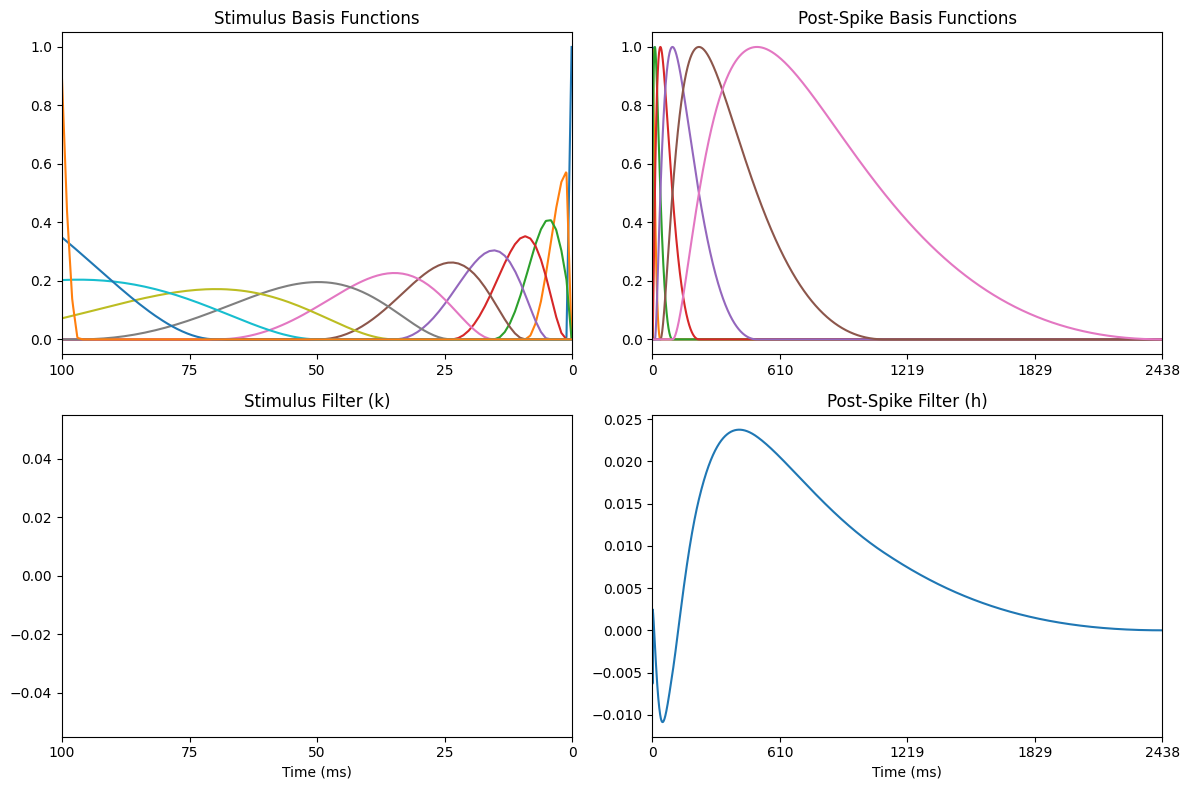

kbasis shape: (1000, 16)
kbasis min: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. nan nan nan nan]
kbasis max: [1.         0.57093619 0.4074809  0.35266878 0.3043976  0.26275986
 0.22695495 0.19607026 0.17197357 0.20423771 0.34873715 0.89229256
        nan        nan        nan        nan]
Stimulus filter (k): [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan na

In [26]:
k, h, dc, prs_opt, kbasis, hbasis = fit_GLM(I, spikes, dt=dt, kbasprs=kbasprs, ihbasprs=ihbasprs, softRect=0,plotFlag=True,L2pen=0.00, maxIter=1000, tolFun=1e-12)

# Check the dimensions, min, and max of kbasis in Python
print("kbasis shape:", kbasis.shape)
print("kbasis min:", np.min(kbasis, axis=0))
print("kbasis max:", np.max(kbasis, axis=0))

# Also print the optimized parameters
print("Stimulus filter (k):", k)
print("Post-spike filter (h):", h)
print("DC offset (dc):", dc)


In [5]:
# # L2 values to test (logarithmic scale)
# L2_values = np.logspace(-1, 1, 20)

# # Find optimal L2 regularization
# L2_values, negLL_values = find_optimal_L2(I, spikes, dt=0.01, kbasprs=kbasprs, ihbasprs=ihbasprs, L2_values=L2_values)

# Plot L2 regularization values against negative log-likelihood
plt.figure(figsize=(8, 6))
plt.plot(L2_values, negLL_values, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Logarithmic scale for L2 values
plt.xlabel('L2 Regularization (log scale)')
plt.ylabel('Negative Log-Likelihood')
plt.title('L2 Regularization vs Negative Log-Likelihood')
plt.grid(True)
plt.show()

NameError: name 'L2_values' is not defined

<Figure size 800x600 with 0 Axes>

In [6]:

# L2 values to test (logarithmic scale)
L2_values = np.logspace(-1, 1, 20)

# Find optimal L2 regularization using cross-validation
best_L2, L2_values, negLL_values = find_optimal_L2_cv(
    I, spikes, dt=0.01, 
    kbasprs=kbasprs, 
    ihbasprs=ihbasprs, 
    L2_values=L2_values, 
    nkt=100, 
    maxIter=100, 
    tolFun=1e-8, 
    n_splits=5
)

# Plot L2 regularization values against average negative log-likelihood
plt.figure(figsize=(8, 6))
plt.plot(L2_values, negLL_values, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Logarithmic scale for L2 values
plt.xlabel('L2 Regularization (log scale)')
plt.ylabel('Average Negative Log-Likelihood (Validation)')
plt.title('L2 Regularization vs Average Negative Log-Likelihood (5-Fold CV)')
plt.grid(True)
plt.axvline(best_L2, color='r', linestyle='--', label=f'Best L2: {best_L2:.2e}')
plt.legend()
plt.show()

print(f"The optimal L2 regularization parameter is: {best_L2:.2e}")


NameError: name 'find_optimal_L2_cv' is not defined

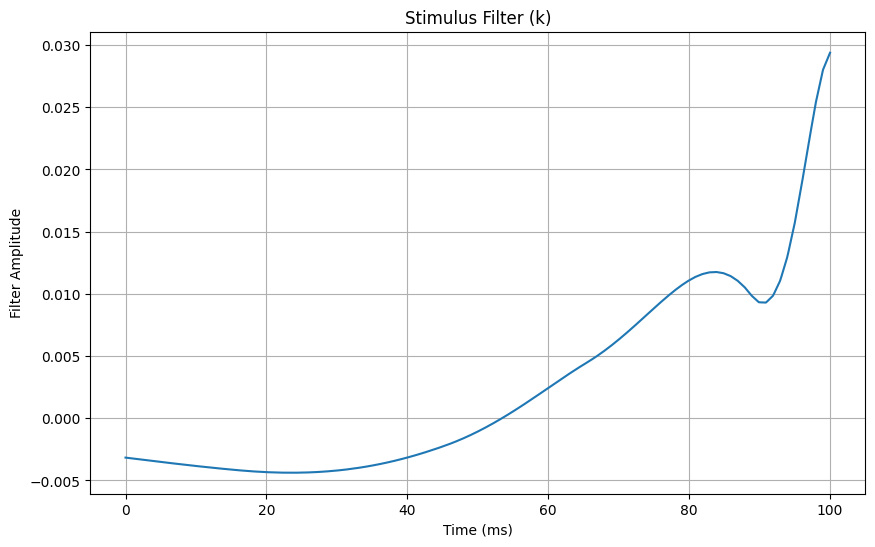

In [7]:
plt.figure(figsize=(10, 6))
time_bins_k = np.linspace(0, len(k) * dt, len(k))
plt.plot(time_bins_k, k)
plt.title('Stimulus Filter (k)')
plt.xlabel('Time (ms)')
plt.ylabel('Filter Amplitude')
plt.grid(True)
plt.show()


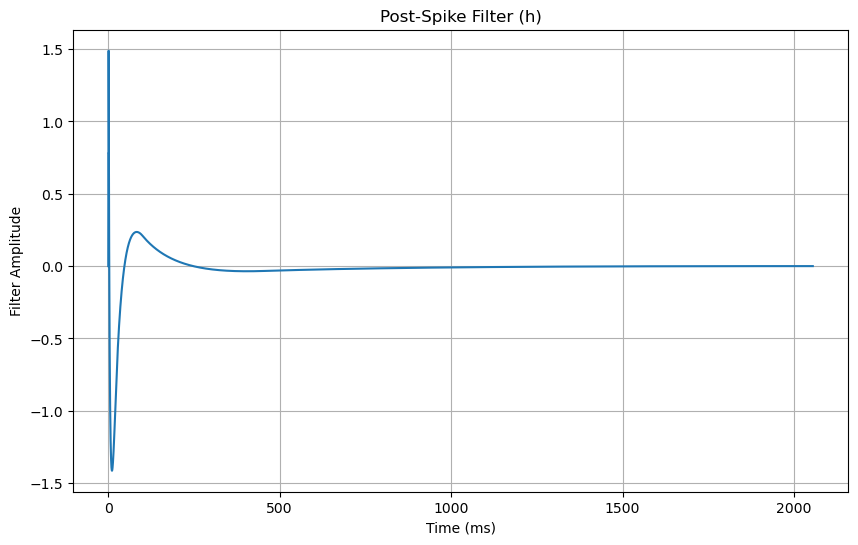

In [ ]:
plt.figure(figsize=(10, 6))
time_bins_h = np.linspace(0, len(h) * dt, len(h))
plt.plot(time_bins_h, h)
plt.title('Post-Spike Filter (h)')
plt.xlabel('Time (ms)')
plt.ylabel('Filter Amplitude')
plt.grid(True)
plt.show()


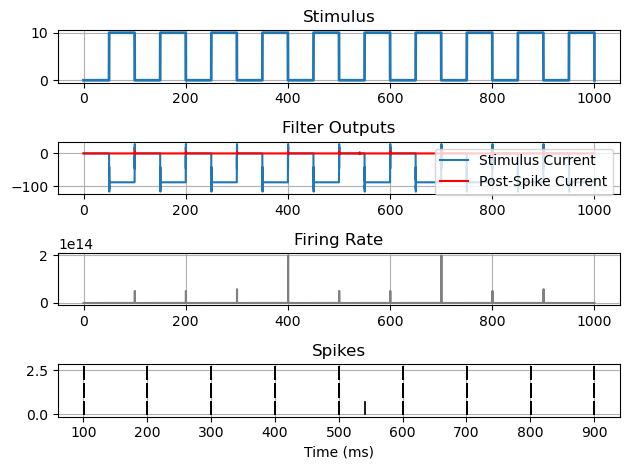

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_glm(x, dt, k, h, dc, runs=5, softRect=False, plotFlag=False):
    """
    Simulates a Poisson GLM response with stimulus and post-spike filters.

    Args:
        x: stimulus (input)
        dt: time step (in ms)
        k: stimulus filter (array)
        h: post-spike filter (array)
        dc: DC offset (float)
        runs: number of trials to simulate (default=5)
        softRect: If True, use soft rectifying nonlinearity (default=False)
        plotFlag: If True, plot the simulation results (default=False)

    Returns:
        y: simulated spike train (binary, 0s and 1s)
        stimcurr: output of stimulus filter (without DC current added)
        hcurr: output of post-spike filter
        r: firing rate (stimcurr + hcurr + dc passed through nonlinearity)
    """
    
    # Define the nonlinearity (logexp for soft-rectification, exponential otherwise)
    if softRect:
        NL = lambda x: np.log1p(np.exp(x))  # Soft rectification: log(1 + exp(x))
    else:
        NL = np.exp  # Standard exponential nonlinearity for Poisson GLM

    nTimePts = len(x)
    refreshRate = 1000 / dt  # Stimulus in ms, sampled at dt

    # Initialize outputs
    g = np.zeros((nTimePts + len(h), runs))  # Filtered stimulus + DC (with post-spike)
    y = np.zeros((nTimePts, runs))  # Response (spike train)
    r = np.zeros((nTimePts + len(h) - 1, runs))  # Firing rate (nonlinearity output)
    hcurr = np.zeros_like(g)  # Post-spike filter current
    stimcurr = np.convolve(x, k, mode='full')[:nTimePts]  # Stimulus filtered by k
    Iinj = stimcurr + dc  # Injected current includes DC

    # Main loop for each run
    for runNum in range(runs):
        g[:, runNum] = np.concatenate((Iinj, np.zeros(len(h))))  # Inject current into the system

        # Loop through each time point
        for t in range(nTimePts):
            # Compute firing rate
            r[t, runNum] = NL(g[t, runNum])  # Nonlinearity applied to input current
            
            # Sample spike with Poisson probability
            if np.random.rand() < (1 - np.exp(-r[t, runNum] / refreshRate)):  # P(spike)
                y[t, runNum] = 1  # Spike occurred
                # Add post-spike filter effect
                g[t:t+len(h), runNum] += h  # Add post-spike filter
                hcurr[t:t+len(h), runNum] += h

    # Trim padded zeros for hcurr and firing rate
    hcurr = hcurr[:nTimePts, :]
    r = r[:nTimePts, :]

    # Plot results if requested
    if plotFlag:
        t = np.arange(nTimePts) * dt

        # Plot stimulus
        plt.subplot(4, 1, 1)
        plt.plot(t, x, linewidth=2)
        plt.title('Stimulus')
        plt.grid()

        # Plot filter outputs
        plt.subplot(4, 1, 2)
        plt.plot(t, Iinj, label='Stimulus Current', linewidth=1.5)
        plt.plot(t, hcurr[:, 0], label='Post-Spike Current', color='red', linewidth=1.5)
        plt.title('Filter Outputs')
        plt.legend()
        plt.grid()

        # Plot firing rate
        plt.subplot(4, 1, 3)
        plt.plot(t, NL(hcurr[:, 0] + Iinj), color='gray', linewidth=1.5)
        plt.title('Firing Rate')
        plt.grid()

        # Plot GLM spikes
        plt.subplot(4, 1, 4)
        spikeHeight = 0.7
        for i in range(runs):
            spt = np.where(y[:, i])[0]
            for spikeTime in spt:
                plt.plot([spikeTime * dt, spikeTime * dt], [i, i + spikeHeight], color='black', linewidth=1.25)
        plt.title('Spikes')
        plt.xlabel('Time (ms)')
        plt.grid()

        plt.tight_layout()
        plt.show()

    return y, stimcurr, hcurr, r

# Simulated parameters
T = 1000
  # DC offset

# Simulate GLM response
y, stimcurr, hcurr, r = simulate_glm(I, dt=0.01, k=k, h=h, dc=dc, runs=3, softRect=False, plotFlag=True)



## GLM parameters. Figure out how to optimize them per celltype?